# Import Important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv("storedata.csv")
pd.set_option("display.max_columns" , 24)

In [26]:
df.head(3)

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,Number of Records,Order Date,...,Order Quantity,Postal Code,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,"Scissors, Rulers and Trimmers",Washington,Small Pack,2867,Dana Teague,Corporate,Office Supplies,0.01,11237,Kleencut® Forged Office Shears by Acme United ...,1,2/18/2018,...,2,20016,0.55,-5,East,2,7,2/19/2018,Regular Air,3,District of Columbia,2
1,Storage & Organization,Oxford,Medium Box,1821,Vanessa Boyer,Consumer,Office Supplies,0.06,10730,Eldon Simplefile® Box Office®,1,8/5/2016,...,25,1540,0.57,-37,East,27,312,8/7/2016,Regular Air,6,Massachusetts,12
2,Telephones and Communication,Irving,Small Box,1402,Wesley Tate,Corporate,Technology,0.08,10070,I888 World Phone,1,3/15/2018,...,20,75061,0.60,258,Central,52,2635,3/17/2018,Regular Air,8,Texas,156


In [5]:
df.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

In [4]:
#Total Number of rows and columns
df.shape

(9426, 26)

# Data Cleaning

In [6]:
#Finding null values in data set
df.isnull().sum()

Category               0
City                   0
Container              0
Customer ID            0
Customer Name          0
Customer Segment       0
Department             0
Discount               0
Item ID                0
Item                   0
Number of Records      0
Order Date             0
Order ID               0
Order Priority         0
Order Quantity         0
Postal Code            0
Product Base Margin    0
Profit                 0
Region                 0
Row ID                 0
Sales                  0
Ship Date              0
Ship Mode              0
Shipping Cost          0
State                  0
Unit Price             0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             9426 non-null   object 
 1   City                 9426 non-null   object 
 2   Container            9426 non-null   object 
 3   Customer ID          9426 non-null   int64  
 4   Customer Name        9426 non-null   object 
 5   Customer Segment     9426 non-null   object 
 6   Department           9426 non-null   object 
 7   Discount             9426 non-null   float64
 8   Item ID              9426 non-null   int64  
 9   Item                 9426 non-null   object 
 10  Number of Records    9426 non-null   int64  
 11  Order Date           9426 non-null   object 
 12  Order ID             9426 non-null   int64  
 13  Order Priority       9426 non-null   object 
 14  Order Quantity       9426 non-null   int64  
 15  Postal Code          9426 non-null   i

In [7]:
df.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

# Exploratory Data Analysis

In [9]:
df["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

#  Orders Priority

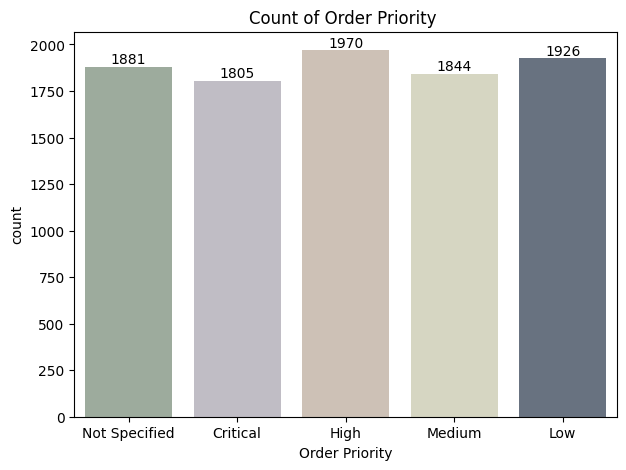

In [241]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x="Order Priority", hue="Order Priority", data=df, saturation=0.2, palette="Accent", dodge=False)

plt.title("Count of Order Priority ")
plt.savefig("Order Priority")

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

 From Above Graph it is clear whihc order  priority has high orders 

# ship mode

In [63]:
df["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [244]:
x=df["Ship Mode"].value_counts().index
y=df["Ship Mode"].value_counts().values


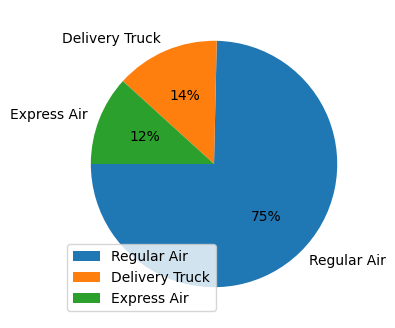

In [246]:
plt.figure(figsize=(7,4))
labels = ["Regular Air", "Delivery Truck", "Express Air"]
plt.pie(y , labels=labels , autopct="%0.0f%%"  , startangle=180 )
plt.legend(loc=3)
plt.savefig("Ship Mode")
plt.show()

# shiping cost of each ship mode

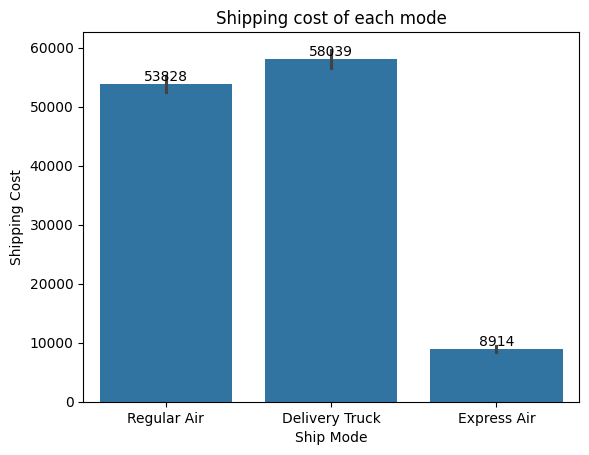

In [247]:
ax=sns.barplot(x="Ship Mode"  , y="Shipping Cost", data=df , estimator="sum")
plt.title("Shipping cost of each mode")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Shipping cost of each mode")
plt.show()

From Above graph it is clear which Shipping mode has high shipping and how much cost which mode is hihg expesive

# Region

In [79]:
df["Region"].value_counts()

Region
East       3099
Central    2589
West       1949
South      1789
Name: count, dtype: int64

In [81]:
x=df["Region"].value_counts().index
y=df["Region"].value_counts().values


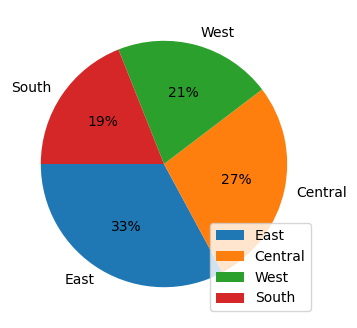

In [90]:
plt.figure(figsize=(7,4))
labels = ["East", "Central", "West"  , "South"]
plt.pie(y , labels=labels , autopct="%0.0f%%"  , startangle=180 )
plt.legend(loc=4)
plt.show()

From above graph it is clear which Region has hihg orders or sales

# Sales of product for each Department on specific Ship  Mode

In [100]:
df["Department"].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

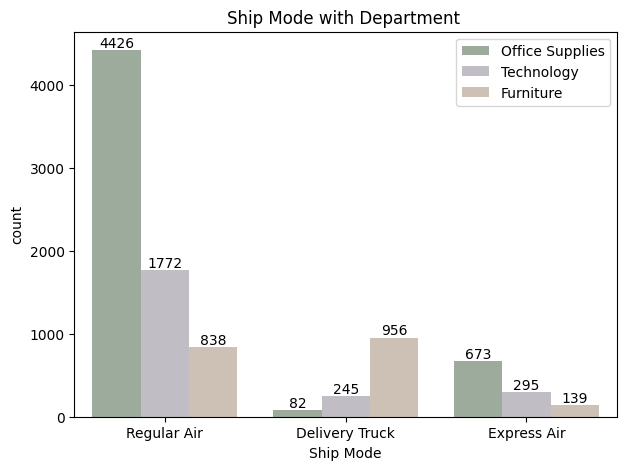

In [249]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x="Ship Mode" , data=df, saturation=0.2 , palette="Accent" , legend=False , hue="Department" )
plt.title("Ship Mode with Department ")
plt.legend(labels=['Office Supplies', 'Technology', 'Furniture'],)

for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Ship Mode With Department")
plt.show()

# Department

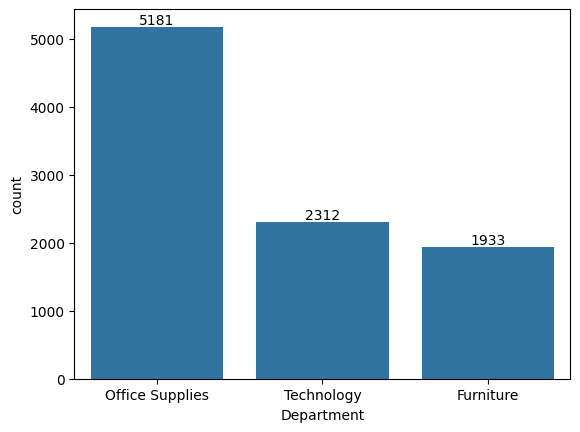

In [248]:
ax=sns.countplot(x="Department" , data=df)


for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Department")
plt.show()

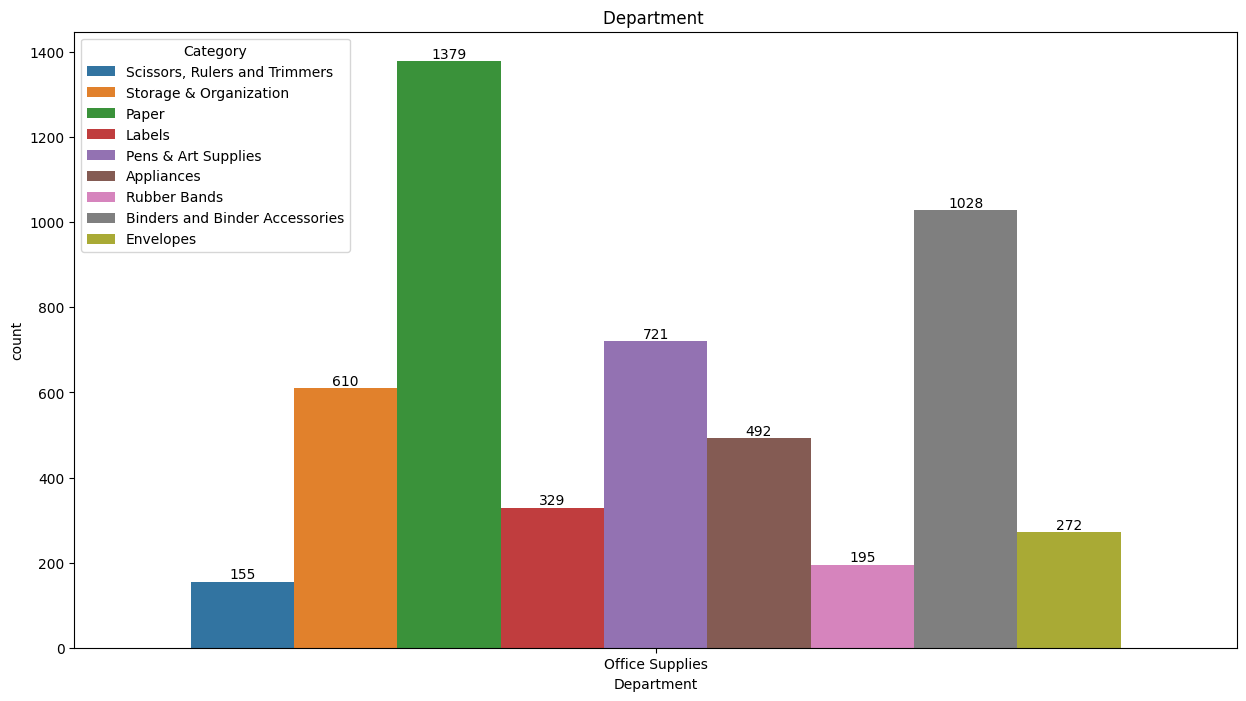

In [130]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x="Department" , data=df[df["Department"]=="Office Supplies"] , hue="Category")
plt.title("Department ")

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# product category

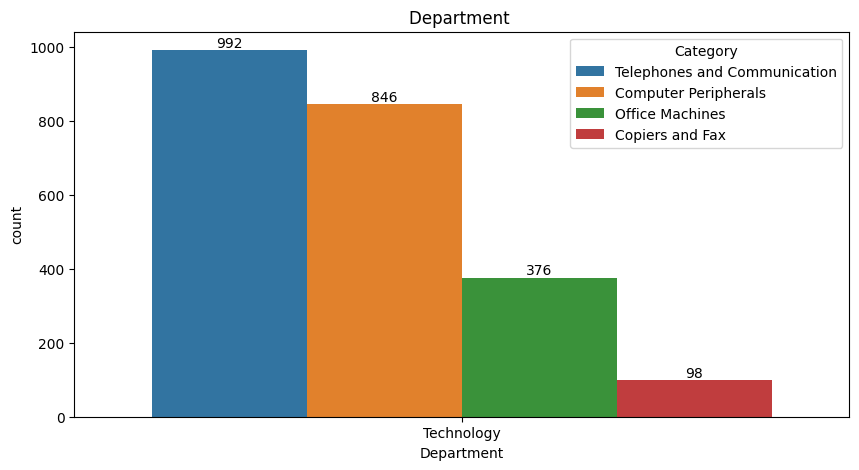

In [127]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Department" , data=df[df["Department"]=="Technology"] , hue="Category")
plt.title("Department ")

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

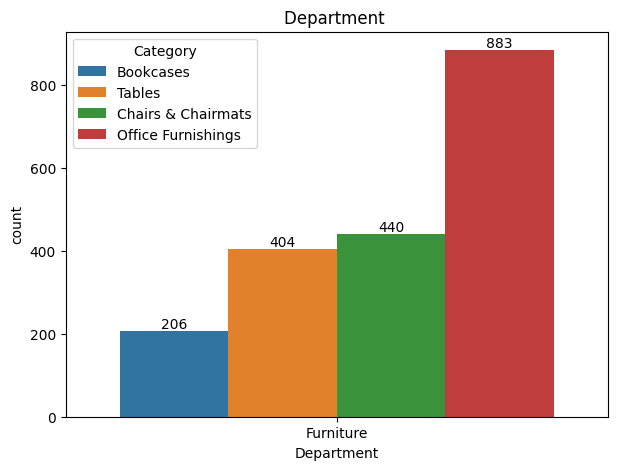

In [122]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x="Department" , data=df[df["Department"]=="Furniture"] , hue="Category")
plt.title("Department ")

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

From Above Three graphs it is clear which product department has high sales

# Per Year Sales

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             9426 non-null   object 
 1   City                 9426 non-null   object 
 2   Container            9426 non-null   object 
 3   Customer ID          9426 non-null   int64  
 4   Customer Name        9426 non-null   object 
 5   Customer Segment     9426 non-null   object 
 6   Department           9426 non-null   object 
 7   Discount             9426 non-null   float64
 8   Item ID              9426 non-null   int64  
 9   Item                 9426 non-null   object 
 10  Number of Records    9426 non-null   int64  
 11  Order Date           9426 non-null   object 
 12  Order ID             9426 non-null   int64  
 13  Order Priority       9426 non-null   object 
 14  Order Quantity       9426 non-null   int64  
 15  Postal Code          9426 non-null   i

In [133]:
df["Order Date"] = pd.to_datetime(df["Order Date"])


In [134]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Category             9426 non-null   object        
 1   City                 9426 non-null   object        
 2   Container            9426 non-null   object        
 3   Customer ID          9426 non-null   int64         
 4   Customer Name        9426 non-null   object        
 5   Customer Segment     9426 non-null   object        
 6   Department           9426 non-null   object        
 7   Discount             9426 non-null   float64       
 8   Item ID              9426 non-null   int64         
 9   Item                 9426 non-null   object        
 10  Number of Records    9426 non-null   int64         
 11  Order Date           9426 non-null   datetime64[ns]
 12  Order ID             9426 non-null   int64         
 13  Order Priority       9426 non-nul

In [136]:
df["Order Year"]=df["Order Date"].dt.year

In [138]:
df["Shiping Year"]=df["Ship Date"].dt.year

In [139]:
df["Order Year"].value_counts()

Order Year
2018    3054
2017    2241
2016    2179
2015    1952
Name: count, dtype: int64

# Year wise orders

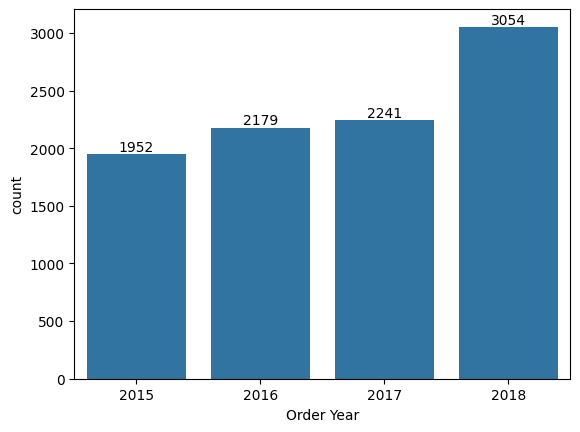

In [153]:
ax=sns.countplot(x="Order Year" , data=df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

From above graph it is clear which year has high orders

# profit

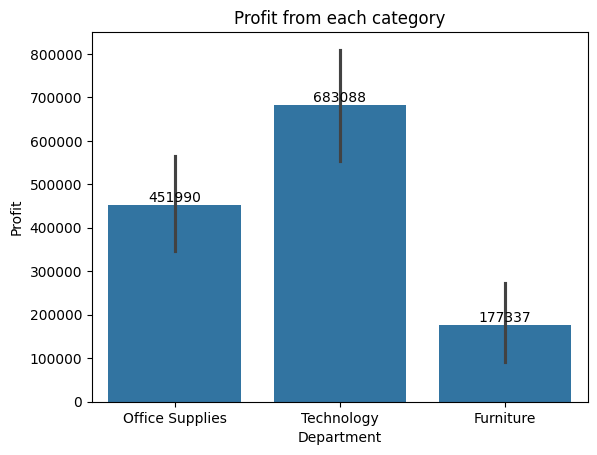

In [251]:
ax=sns.barplot(x="Department"  , y="Profit", data=df , estimator="sum")
plt.title("Profit from each category")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Profit")
plt.show()


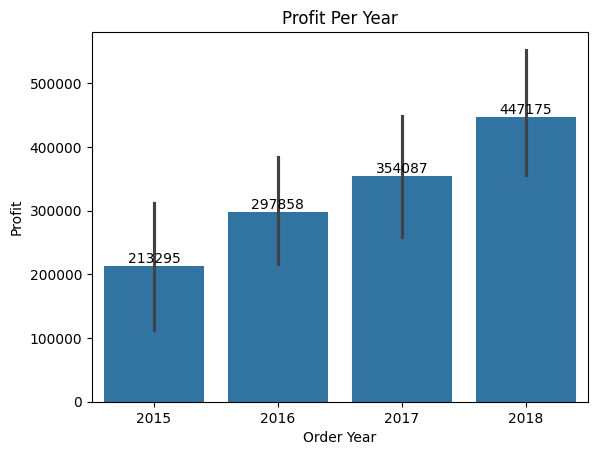

In [250]:
ax=sns.barplot(x="Order Year"  , y="Profit", data=df , estimator="sum")
plt.title("Profit Per Year")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Yearly Profit")

plt.show()    

From Above graph it is clear which Department product has more profit and which year has profit

# State And City

In [163]:
df["State"].value_counts()

State
Texas                   1029
Massachusetts            878
California               798
New York                 469
Florida                  382
Connecticut              360
Michigan                 327
Ohio                     306
Pennsylvania             271
North Carolina           251
Oregon                   249
Virginia                 198
Georgia                  194
Washington               189
Maryland                 178
New Jersey               177
Wisconsin                169
Tennessee                166
Missouri                 161
Iowa                     156
Minnesota                148
Utah                     146
Kansas                   133
Indiana                  131
Maine                    128
New Hampshire            125
Alabama                  125
Colorado                 122
Arizona                  121
Arkansas                 118
Idaho                    114
South Carolina           105
Oklahoma                 104
Illinois                  92
Louisian

In [158]:
df["City"].value_counts()

City
Oxford         438
Boston         305
Irving         262
Southbury      177
Santa Rosa     109
              ... 
Groton           1
Willimantic      1
Woburn           1
Wallingford      1
Woodbridge       1
Name: count, Length: 1282, dtype: int64

In [167]:
# Top 5 cities with respect to sales
top_2_states = df["State"].value_counts()[:5]
top_2_cities = df["City"].value_counts()[:5]

top_2_states


State
Texas            1029
Massachusetts     878
California        798
New York          469
Florida           382
Name: count, dtype: int64

In [166]:
top_2_cities

City
Oxford        438
Boston        305
Irving        262
Southbury     177
Santa Rosa    109
Name: count, dtype: int64

From above Analysis it is clear which city and which state has high sales or orders bring

# Profit Margin

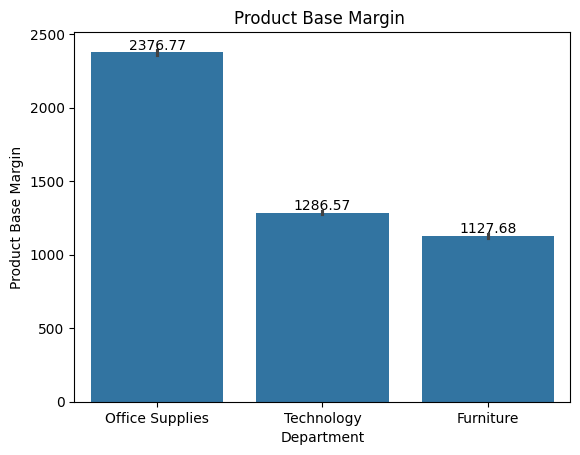

In [252]:
ax=sns.barplot(x="Department"  , y="Product Base Margin", data=df , estimator="sum")
plt.title("Product Base Margin ")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Profit Margin")
plt.show()

From above graph it is clear which product department has high margin in each order

# Container

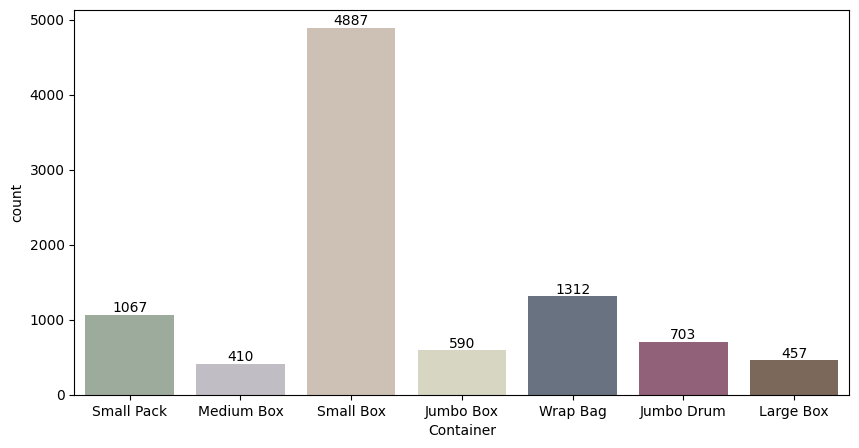

In [240]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Container" , data=df , palette="Accent" , hue="Container" ,  dodge=False , saturation=0.2,)


for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Yearly Analysis with respect to Each product department

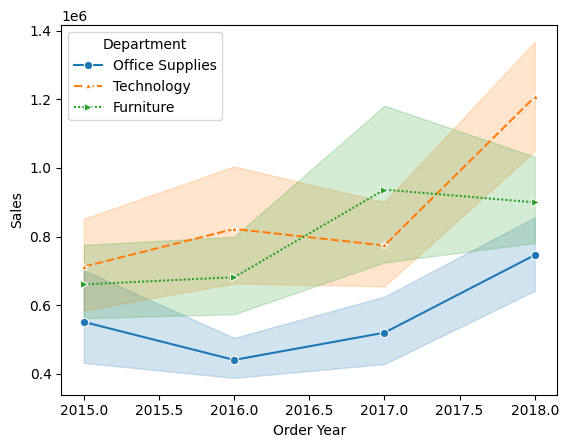

In [217]:
sns.lineplot(x=df["Order Year"]  , y=df["Sales"] , data=df ,estimator="sum",hue="Department",style="Department"  ,
             markers=["o" , "*" , ">"])
plt.show()

From Above graph it is clear which product department sales is goes above or below

# Customer Segment 

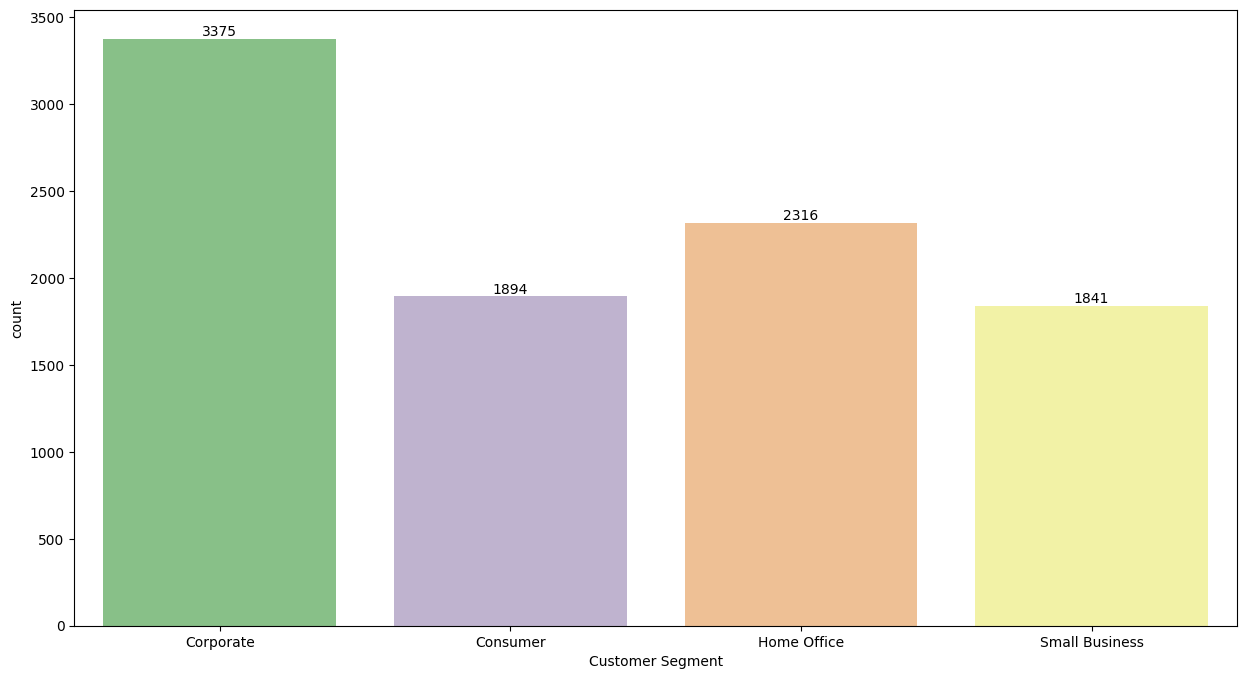

In [254]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Customer Segment", hue="Customer Segment", data=df, palette="Accent", dodge=False)


for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Customer Segment")

plt.show()

From above graph it is clear which customer segment has high sales

# Gap of days between order and ship date


In [ ]:
df['Gap (days)'] = (df['Ship Date'] - df['Order Date']).dt.days

In [224]:
df['Gap (days)'].value_counts()

Gap (days)
2     3595
1     2969
0     1145
3      434
4      399
7      372
5      363
9       99
6       20
8        5
17       4
19       3
11       3
15       2
28       2
31       2
27       2
24       1
14       1
10       1
22       1
18       1
91       1
83       1
Name: count, dtype: int64

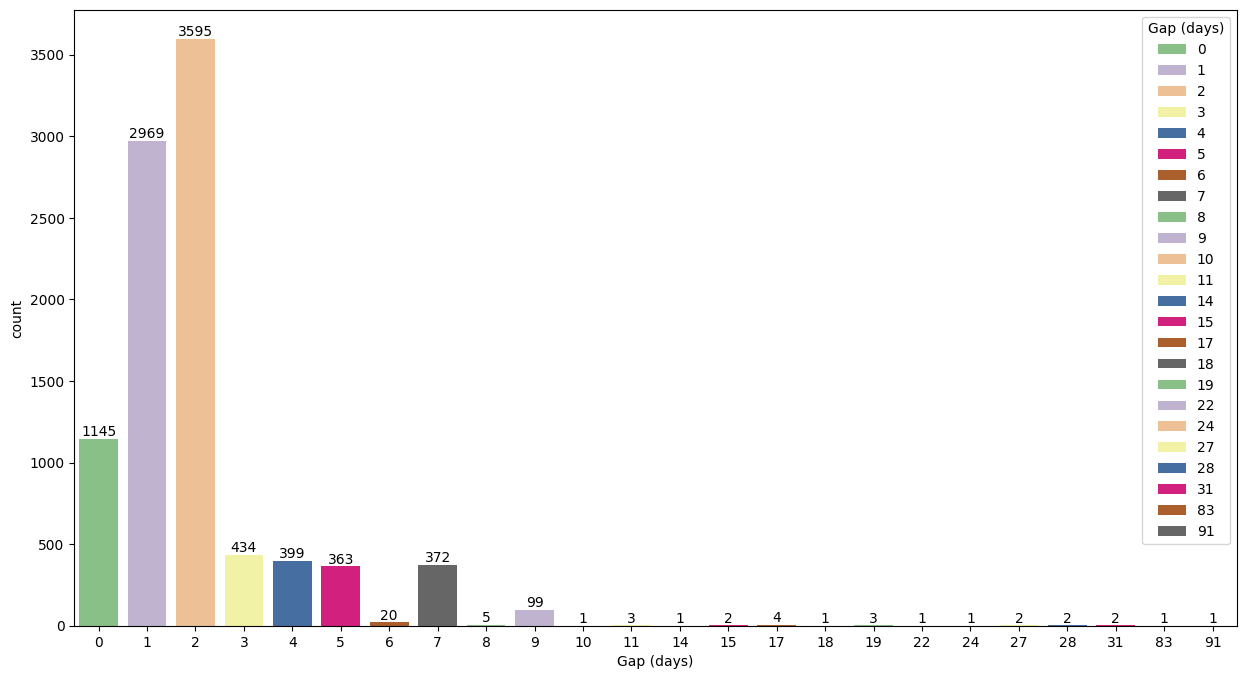

In [253]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df['Gap (days)'], hue=df['Gap (days)'], palette="Accent", dodge=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Gap between ship and order")
plt.show()


From above graph it is clear most of the orders take 2 days from order date to ship date

# Baidar Ahmad
# Data Analyst
# Baidarahmad417@gmail.com
# Thank You!